In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(font_scale=1, style='white')

In [3]:
run = pd.read_csv('results/spearmanr.csv', index_col=0)

In [7]:
names = list(np.unique(run['type']))
clist = np.array(['mustard', 'black', 'gray'])
colors = {'mustard':'#E1AD01', 'black': '#000000', 'gray': '#808080'}

In [5]:
vals = []
for name in names:
    vals.append(run[(run['spacing'] == 2**9) & (run['metric'] == 'Spearman') & (run['type'] == name)]['value'].mean())

names = np.array(names)
names = names[np.argsort(vals)[::-1]]
clist = clist[np.argsort(vals)[::-1]]

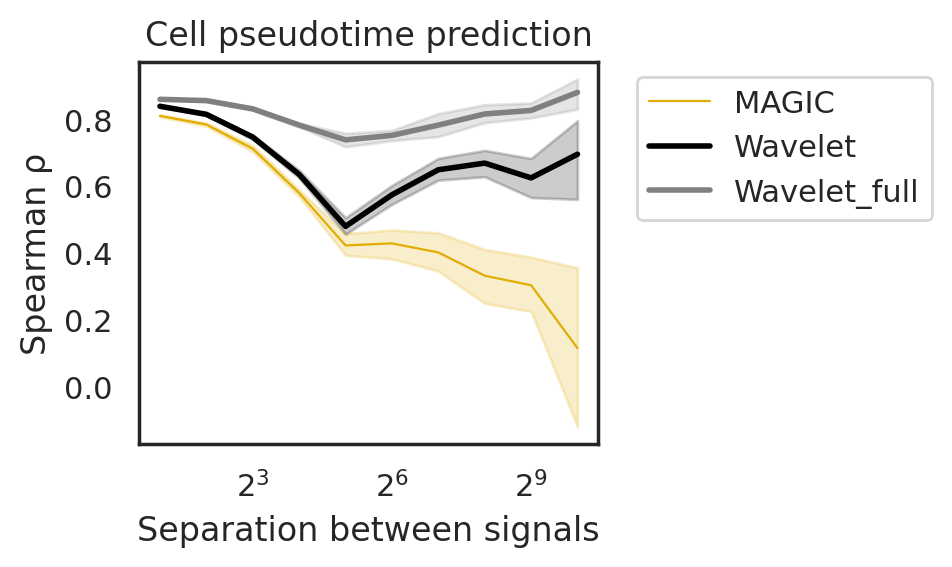

In [8]:
for metric in ['Spearman']:
    fig, ax = plt.subplots(dpi=200, figsize=(5,3))
    for i,type in enumerate(list(names)):
        linewidth=0.8
        if type.startswith('Wavelet'):
            linewidth=2
        if type in names:
            sns.lineplot(x=run[(run['type'] == type) & (run['metric'] == metric)]['spacing'],
                 y=run[(run['type'] == type) & (run['metric'] == metric)]['value'].astype(float),
                 ax=ax, label=type, linewidth=linewidth, color=colors[clist[i]])

    plt.legend(bbox_to_anchor=(1.05,1))
    ax.set_xscale('log', base=2)

    plt.xlabel('Separation between signals')
    plt.ylabel(f'{metric} ρ')
    plt.title('Cell pseudotime prediction')
    plt.tight_layout()
    
    fig.savefig('figures/pseudotime_prediction.png', dpi=200)